In [236]:
#Importacion de librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import scipy as sp
import sklearn
from sklearn.feature_selection import SelectPercentile, f_classif,chi2
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import metrics,feature_selection
from sklearn.metrics import accuracy_score
import statsmodels.api as sm


In [237]:
bill = pd.read_csv('billboard.csv', sep=',',encoding='latin',parse_dates=['date.entered','date.peaked'],infer_datetime_format=True)

In [238]:
bill.head(10)

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2000,Janet,Doesn't Really Matter,4:17,Rock,2000-06-17,2000-08-26,59,52.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2000,Destiny's Child,Say My Name,4:31,Rock,1999-12-25,2000-03-18,83,83.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2000,"Iglesias, Enrique",Be With You,3:36,Latin,2000-04-01,2000-06-24,63,45.0,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2000,Sisqo,Incomplete,3:52,Rock,2000-06-24,2000-08-12,77,66.0,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,81,54.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [239]:
bill.drop('year',axis=1, inplace=True)

In [240]:
bill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 82 columns):
artist.inverted    317 non-null object
track              317 non-null object
time               317 non-null object
genre              317 non-null object
date.entered       317 non-null datetime64[ns]
date.peaked        317 non-null datetime64[ns]
x1st.week          317 non-null int64
x2nd.week          312 non-null float64
x3rd.week          307 non-null float64
x4th.week          300 non-null float64
x5th.week          292 non-null float64
x6th.week          280 non-null float64
x7th.week          269 non-null float64
x8th.week          260 non-null float64
x9th.week          253 non-null float64
x10th.week         244 non-null float64
x11th.week         236 non-null float64
x12th.week         222 non-null float64
x13th.week         210 non-null float64
x14th.week         204 non-null float64
x15th.week         197 non-null float64
x16th.week         182 non-null float64
x17th.w

se observa que las semanas 66 y 76 no hay registro de ningun ranking de las canciones, entonces eliminamos esas columnas
Incluso desde la semana 34 se observan menos de 12 canciones en el ranking

In [241]:
bill_drop=bill.drop(bill.columns[38:82], axis=1) 

In [242]:
bill_drop.head()

,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,x4th.week,...,x23rd.week,x24th.week,x25th.week,x26th.week,x27th.week,x28th.week,x29th.week,x30th.week,x31st.week,x32nd.week
0,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,33.0,...,10.0,12.0,15.0,22.0,29.0,31.0,NaN,NaN,NaN,NaN
1,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,5.0,...,26.0,36.0,48.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,31.0,...,8.0,12.0,14.0,17.0,21.0,24.0,30.0,34.0,37.0,46.0
3,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,14.0,...,29.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,29.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [243]:
bill_sem=bill_drop.iloc[:,6:]

In [244]:
bill_sem.head()

,x1st.week,x2nd.week,x3rd.week,x4th.week,x5th.week,x6th.week,x7th.week,x8th.week,x9th.week,x10th.week,...,x23rd.week,x24th.week,x25th.week,x26th.week,x27th.week,x28th.week,x29th.week,x30th.week,x31st.week,x32nd.week
0,78,63.0,49.0,33.0,23.0,15.0,7.0,5.0,1.0,1.0,...,10.0,12.0,15.0,22.0,29.0,31.0,NaN,NaN,NaN,NaN
1,15,8.0,6.0,5.0,2.0,3.0,2.0,2.0,1.0,1.0,...,26.0,36.0,48.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN
2,71,48.0,43.0,31.0,20.0,13.0,7.0,6.0,4.0,4.0,...,8.0,12.0,14.0,17.0,21.0,24.0,30.0,34.0,37.0,46.0
3,41,23.0,18.0,14.0,2.0,1.0,1.0,1.0,1.0,2.0,...,29.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,57,47.0,45.0,29.0,23.0,18.0,11.0,9.0,9.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [245]:
#contar los valores missing en cada columna
missing_values_count =bill_sem.isnull().sum()

In [246]:
missing_values_count

x1st.week       0
x2nd.week       5
x3rd.week      10
x4th.week      17
x5th.week      25
x6th.week      37
x7th.week      48
x8th.week      57
x9th.week      64
x10th.week     73
x11th.week     81
x12th.week     95
x13th.week    107
x14th.week    113
x15th.week    120
x16th.week    135
x17th.week    140
x18th.week    151
x19th.week    161
x20th.week    171
x21st.week    252
x22nd.week    262
x23rd.week    269
x24th.week    271
x25th.week    279
x26th.week    281
x27th.week    288
x28th.week    293
x29th.week    297
x30th.week    297
x31st.week    298
x32nd.week    299
dtype: int64

In [247]:
#Contamos el total de datos
total_cells_sem = np.product(bill_sem.shape)

In [248]:
#Contamos el total de valores missing
total_missing_sem = missing_values_count.sum()

In [249]:
#Porcentaje de valores NAN
(total_missing_sem /total_cells_sem)*100

49.25078864353312

In [250]:
#Realizamos la imputacion
bill_imp = bill_sem.fillna(method='pad',axis=1)
bill_imp.head()


,x1st.week,x2nd.week,x3rd.week,x4th.week,x5th.week,x6th.week,x7th.week,x8th.week,x9th.week,x10th.week,...,x23rd.week,x24th.week,x25th.week,x26th.week,x27th.week,x28th.week,x29th.week,x30th.week,x31st.week,x32nd.week
0,78.0,63.0,49.0,33.0,23.0,15.0,7.0,5.0,1.0,1.0,...,10.0,12.0,15.0,22.0,29.0,31.0,31.0,31.0,31.0,31.0
1,15.0,8.0,6.0,5.0,2.0,3.0,2.0,2.0,1.0,1.0,...,26.0,36.0,48.0,47.0,47.0,47.0,47.0,47.0,47.0,47.0
2,71.0,48.0,43.0,31.0,20.0,13.0,7.0,6.0,4.0,4.0,...,8.0,12.0,14.0,17.0,21.0,24.0,30.0,34.0,37.0,46.0
3,41.0,23.0,18.0,14.0,2.0,1.0,1.0,1.0,1.0,2.0,...,29.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0
4,57.0,47.0,45.0,29.0,23.0,18.0,11.0,9.0,9.0,11.0,...,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0


In [251]:
billB = bill.copy()

media = bill_imp.mean(axis=1)
minimo = bill_imp.min(axis=1)
maximo = bill_imp.max(axis=1)
suma = bill_imp.sum(axis=1)
conteo = bill_imp.count(numeric_only = True , axis=1)

In [252]:
billB = billB.iloc[:,0:6]
billB['media']= media
billB['min'] = minimo 
billB['maximo'] = maximo
billB['suma'] = suma
billB['conteo'] = conteo


In [253]:
billB['Periodo_time'] = (bill['date.peaked'] - bill['date.entered']).dt.days

In [254]:
def periodo_en_semanas(x):
    semanas = x/7
    return semanas

In [255]:
billB["Periodo_sem"] = billB["Periodo_time"].apply(periodo_en_semanas)


In [256]:
def change_column_order(df, col_name, index):
    cols = df.columns.tolist()
    cols.remove(col_name)
    cols.insert(index, col_name)
    
    return df[cols]

In [257]:
billB=change_column_order(billB,'Periodo_time', 6)

In [258]:
billB.head()

,artist.inverted,track,time,genre,date.entered,date.peaked,Periodo_time,media,min,maximo,suma,conteo,Periodo_sem
0,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,56,16.84375,1.0,78.0,539.0,32,8.0
1,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,56,17.34375,1.0,48.0,555.0,32,8.0
2,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,98,16.43750,1.0,71.0,526.0,32,14.0
3,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,35,21.09375,1.0,44.0,675.0,32,5.0
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,70,28.21875,1.0,57.0,903.0,32,10.0


In [259]:
billB.shape

(317, 13)

In [260]:
billB=change_column_order(billB,'Periodo_sem',7)

In [261]:
billB.head()

,artist.inverted,track,time,genre,date.entered,date.peaked,Periodo_time,Periodo_sem,media,min,maximo,suma,conteo
0,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,56,8.0,16.84375,1.0,78.0,539.0,32
1,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,56,8.0,17.34375,1.0,48.0,555.0,32
2,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,98,14.0,16.43750,1.0,71.0,526.0,32
3,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,35,5.0,21.09375,1.0,44.0,675.0,32
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,70,10.0,28.21875,1.0,57.0,903.0,32


Al realizar la imputacion hacia delante todos los valores NaN son reemplazados y por ello todas las canciones se registran en todas las columnas

In [262]:
#Agrupamos por genero
genre_gr=billB.groupby('genre')

In [263]:
pd.value_counts(bill['genre'])

Rock           137
Country         74
Rap             58
R&B             23
Pop              9
Latin            9
Electronica      4
Gospel           1
Jazz             1
Reggae           1
Name: genre, dtype: int64

In [264]:
genre_gr.get_group('Gospel')

,artist.inverted,track,time,genre,date.entered,date.peaked,Periodo_time,Periodo_sem,media,min,maximo,suma,conteo
200,"Adams, Yolanda",Open My Heart,5:30,Gospel,2000-08-26,2000-10-21,56,8.0,75.71875,57.0,89.0,2423.0,32


In [265]:
genre_gr.get_group('Jazz')

,artist.inverted,track,time,genre,date.entered,date.peaked,Periodo_time,Periodo_sem,media,min,maximo,suma,conteo
49,Kenny G,Auld Lang Syne (The Millenium Mix),7:50,Jazz,1999-12-25,2000-01-08,14,2.0,63.78125,7.0,89.0,2041.0,32


In [266]:
genre_gr.get_group('Reggae')

,artist.inverted,track,time,genre,date.entered,date.peaked,Periodo_time,Periodo_sem,media,min,maximo,suma,conteo
189,Beenie Man,Girls Dem Sugar,4:17,Reggae,2000-10-21,2000-12-02,42,6.0,84.40625,54.0,95.0,2701.0,32


In [267]:
bill_sem.iloc[[49,189,200],:].transpose()

,49,189,200
x1st.week,89.0,72.0,76.0
x2nd.week,89.0,72.0,76.0
x3rd.week,7.0,63.0,74.0
x4th.week,8.0,56.0,69.0
x5th.week,66.0,62.0,68.0
x6th.week,NaN,63.0,67.0
x7th.week,NaN,54.0,61.0
x8th.week,NaN,60.0,58.0
x9th.week,NaN,69.0,57.0
x10th.week,NaN,75.0,59.0


Observamos q la unica cancion del genero JAZZ aparecio solo 5 veces y no llego a ser un hit
Los generos GOSPEL y REGGAE tampoco llegaron a ser un hit
Por ello se eliminan estos tres registros

In [268]:
#billB=billB.drop(index=[49,189,200],axis=1).shape
billB=billB.drop([49, 189,200])

In [269]:
#bill_sem=bill_sem.drop(index=[49,189,200],axis=1).shape
bill_sem=bill_sem.drop([49, 189,200])

In [270]:
billB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314 entries, 0 to 316
Data columns (total 13 columns):
artist.inverted    314 non-null object
track              314 non-null object
time               314 non-null object
genre              314 non-null object
date.entered       314 non-null datetime64[ns]
date.peaked        314 non-null datetime64[ns]
Periodo_time       314 non-null int64
Periodo_sem        314 non-null float64
media              314 non-null float64
min                314 non-null float64
maximo             314 non-null float64
suma               314 non-null float64
conteo             314 non-null int64
dtypes: datetime64[ns](2), float64(5), int64(2), object(4)
memory usage: 34.3+ KB


In [271]:
genre_gr.get_group('Rock')

,artist.inverted,track,time,genre,date.entered,date.peaked,Periodo_time,Periodo_sem,media,min,maximo,suma,conteo
0,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,56,8.0,16.84375,1.0,78.0,539.0,32
1,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,56,8.0,17.34375,1.0,48.0,555.0,32
2,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,98,14.0,16.43750,1.0,71.0,526.0,32
3,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,35,5.0,21.09375,1.0,44.0,675.0,32
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,70,10.0,28.21875,1.0,57.0,903.0,32
5,Janet,Doesn't Really Matter,4:17,Rock,2000-06-17,2000-08-26,70,10.0,24.81250,1.0,59.0,794.0,32
6,Destiny's Child,Say My Name,4:31,Rock,1999-12-25,2000-03-18,84,12.0,20.87500,1.0,83.0,668.0,32
8,Sisqo,Incomplete,3:52,Rock,2000-06-24,2000-08-12,49,7.0,28.37500,1.0,77.0,908.0,32
10,N'Sync,It's Gonna Be Me,3:10,Rock,2000-05-06,2000-07-29,84,12.0,27.43750,1.0,82.0,878.0,32
11,"Aguilera, Christina",What A Girl Wants,3:18,Rock,1999-11-27,2000-01-15,49,7.0,25.46875,1.0,71.0,815.0,32


In [272]:
genre_gr.get_group('Rock').describe()

,Periodo_time,Periodo_sem,media,min,maximo,suma,conteo
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.0
mean,57.072993,8.153285,61.109261,36.226277,85.700730,1955.496350,32.0
std,47.611886,6.801698,28.262815,30.609974,13.930692,904.410087,0.0
min,0.000000,0.000000,14.875000,1.000000,42.000000,476.000000,32.0
25%,28.000000,4.000000,32.156250,6.000000,77.000000,1029.000000,32.0
50%,49.000000,7.000000,66.406250,28.000000,90.000000,2125.000000,32.0
75%,77.000000,11.000000,88.062500,64.000000,97.000000,2818.000000,32.0
max,315.000000,45.000000,99.406250,99.000000,100.000000,3181.000000,32.0


In [273]:
genre_gr.get_group('Country')

,artist.inverted,track,time,genre,date.entered,date.peaked,Periodo_time,Periodo_sem,media,min,maximo,suma,conteo
9,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,273,39.0,41.75000,24.0,81.0,1336.0,32
55,"Rimes, LeAnn",I Need You,3:42,Country,2000-05-27,2000-08-12,77,11.0,36.78125,11.0,77.0,1177.0,32
74,"Dixie Chicks, The",Goodbye Earl,4:19,Country,2000-03-18,2000-05-06,49,7.0,75.78125,19.0,98.0,2425.0,32
80,Hanson,This Time Around,4:14,Country,2000-04-22,2000-05-06,14,2.0,85.53125,20.0,95.0,2737.0,32
86,"Brock, Chad",Yes!,3:22,Country,2000-04-08,2000-07-01,84,12.0,50.75000,22.0,90.0,1624.0,32
90,"Rimes, LeAnn",Big Deal,3:03,Country,1999-10-16,2000-01-01,77,11.0,51.75000,23.0,71.0,1656.0,32
101,"Messina, Jo Dee",That's The Way,3:17,Country,2000-06-24,2000-08-26,63,9.0,49.12500,25.0,78.0,1572.0,32
106,"Dixie Chicks, The",Cowboy Take Me Away,4:51,Country,1999-11-27,2000-01-29,63,9.0,52.40625,27.0,79.0,1677.0,32
107,"McGraw, Tim",My Next Thirty Years,3:37,Country,2000-10-21,2000-12-16,56,8.0,50.87500,27.0,73.0,1628.0,32
108,"Tritt, Travis",Best Of Intentions,4:15,Country,2000-08-19,2000-12-02,105,15.0,47.87500,27.0,97.0,1532.0,32


In [274]:
genre_gr.get_group('Country').describe()

,Periodo_time,Periodo_sem,media,min,maximo,suma,conteo
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.0
mean,58.364865,8.337838,75.327703,49.864865,91.756757,2410.486486,32.0
std,35.717144,5.102449,15.271996,20.335760,7.812548,488.703884,0.0
min,0.000000,0.000000,36.781250,11.000000,71.000000,1177.000000,32.0
25%,42.000000,6.000000,66.468750,34.250000,87.000000,2127.000000,32.0
50%,59.500000,8.500000,77.828125,44.500000,93.000000,2490.500000,32.0
75%,70.000000,10.000000,86.687500,68.000000,98.750000,2774.000000,32.0
max,273.000000,39.000000,97.281250,92.000000,100.000000,3113.000000,32.0


In [275]:
genre_gr.get_group('Electronica')

,artist.inverted,track,time,genre,date.entered,date.peaked,Periodo_time,Periodo_sem,media,min,maximo,suma,conteo
43,Eiffel 65,Blue (Da Ba Dee),3:29,Electronica,1999-12-11,2000-01-29,49,7.0,52.18750,6.0,88.0,1670.0,32
109,Alice Deejay,Better Off Alone,6:50,Electronica,2000-04-08,2000-06-03,56,8.0,64.28125,27.0,86.0,2057.0,32
265,Fatboy Slim,The Rockafeller Skank,4:00,Electronica,1999-11-13,2000-01-22,70,10.0,91.65625,76.0,95.0,2933.0,32
288,Madison Avenue,Don't Call Me Baby,3:44,Electronica,2000-07-08,2000-09-16,70,10.0,94.28125,88.0,98.0,3017.0,32


In [276]:
genre_gr.get_group('Electronica').describe().iloc[3:,:]

,Periodo_time,Periodo_sem,media,min,maximo,suma,conteo
min,49.00,7.00,52.187500,6.00,86.00,1670.00,32.0
25%,54.25,7.75,61.257812,21.75,87.50,1960.25,32.0
50%,63.00,9.00,77.968750,51.50,91.50,2495.00,32.0
75%,70.00,10.00,92.312500,79.00,95.75,2954.00,32.0
max,70.00,10.00,94.281250,88.00,98.00,3017.00,32.0


In [277]:
genre_gr.get_group('R&B')

,artist.inverted,track,time,genre,date.entered,date.peaked,Periodo_time,Periodo_sem,media,min,maximo,suma,conteo
66,Profyle,Liar,3:57,R&B,2000-09-16,2000-10-28,42,6.0,66.65625,14.0,99.0,2133.0,32
75,Guy,Dancin',4:08,R&B,1999-12-18,2000-01-01,14,2.0,78.84375,19.0,94.0,2523.0,32
100,D'Angelo,Untitled (How Does It Feel),7:10,R&B,2000-01-22,2000-02-19,28,4.0,69.25000,25.0,94.0,2216.0,32
133,J-Shin,One Night Stand,4:34,R&B,1999-12-25,2000-02-26,63,9.0,80.09375,34.0,99.0,2563.0,32
137,"Carter, Aaron",Aaron's Party (Come Get It),3:23,R&B,2000-08-26,2000-09-16,21,3.0,84.18750,35.0,100.0,2694.0,32
141,Lucy Pearl,Dance Tonight,3:45,R&B,2000-05-20,2000-07-29,70,10.0,73.06250,36.0,92.0,2338.0,32
154,Baha Men,Who Let The Dogs Out,3:17,R&B,2000-07-22,2000-10-21,91,13.0,70.56250,40.0,99.0,2258.0,32
169,Ideal,Whatever,3:48,R&B,2000-06-10,2000-08-19,70,10.0,76.28125,47.0,92.0,2441.0,32
185,Bloodhound Gang,The Bad Touch,4:20,R&B,2000-03-18,2000-04-15,28,4.0,88.46875,52.0,98.0,2831.0,32
191,Kelis,Caught Out There,4:09,R&B,1999-12-04,2000-01-08,35,5.0,81.68750,54.0,90.0,2614.0,32


In [278]:
genre_gr.get_group('R&B').describe()

,Periodo_time,Periodo_sem,media,min,maximo,suma,conteo
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.0
mean,28.608696,4.086957,85.929348,59.304348,96.739130,2749.739130,32.0
std,24.332431,3.476062,9.828886,25.848219,3.208191,314.524348,0.0
min,0.000000,0.000000,66.656250,14.000000,90.000000,2133.000000,32.0
25%,14.000000,2.000000,79.468750,38.000000,94.000000,2543.000000,32.0
50%,21.000000,3.000000,88.468750,59.000000,98.000000,2831.000000,32.0
75%,38.500000,5.500000,93.375000,81.500000,99.000000,2988.000000,32.0
max,91.000000,13.000000,99.000000,99.000000,100.000000,3168.000000,32.0


In [279]:
billB['categoria']=(bill_sem.apply(min, axis = 1) <= 3)

In [280]:
billB.head()

,artist.inverted,track,time,genre,date.entered,date.peaked,Periodo_time,Periodo_sem,media,min,maximo,suma,conteo,categoria
0,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,56,8.0,16.84375,1.0,78.0,539.0,32,True
1,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,56,8.0,17.34375,1.0,48.0,555.0,32,True
2,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,98,14.0,16.43750,1.0,71.0,526.0,32,True
3,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,35,5.0,21.09375,1.0,44.0,675.0,32,True
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,70,10.0,28.21875,1.0,57.0,903.0,32,True


In [281]:
billB.rename(columns={'conteo':'permanencia', 'artist.inverted':'artista' , 'date.entered':'fechaIngreso' , 'date.peaked':'fechaPico'}, inplace=True)

In [282]:
bill_rg = billB.join(pd.get_dummies(billB['categoria'], prefix='cate', prefix_sep='_', drop_first=True))
bill_rg.head()

,artista,track,time,genre,fechaIngreso,fechaPico,Periodo_time,Periodo_sem,media,min,maximo,suma,permanencia,categoria,cate_True
0,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,56,8.0,16.84375,1.0,78.0,539.0,32,True,1
1,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,56,8.0,17.34375,1.0,48.0,555.0,32,True,1
2,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,98,14.0,16.43750,1.0,71.0,526.0,32,True,1
3,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,35,5.0,21.09375,1.0,44.0,675.0,32,True,1
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,70,10.0,28.21875,1.0,57.0,903.0,32,True,1


In [283]:
del bill_rg['categoria']
bill_rg.head()

,artista,track,time,genre,fechaIngreso,fechaPico,Periodo_time,Periodo_sem,media,min,maximo,suma,permanencia,cate_True
0,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,56,8.0,16.84375,1.0,78.0,539.0,32,1
1,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,56,8.0,17.34375,1.0,48.0,555.0,32,1
2,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,98,14.0,16.43750,1.0,71.0,526.0,32,1
3,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,35,5.0,21.09375,1.0,44.0,675.0,32,1
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,70,10.0,28.21875,1.0,57.0,903.0,32,1


In [284]:
# tabla de frecuencia de hits
pd.value_counts(bill_rg['cate_True'])

0    288
1     26
Name: cate_True, dtype: int64

In [285]:
bill_rg.shape

(314, 14)

In [286]:
bill_rg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314 entries, 0 to 316
Data columns (total 14 columns):
artista         314 non-null object
track           314 non-null object
time            314 non-null object
genre           314 non-null object
fechaIngreso    314 non-null datetime64[ns]
fechaPico       314 non-null datetime64[ns]
Periodo_time    314 non-null int64
Periodo_sem     314 non-null float64
media           314 non-null float64
min             314 non-null float64
maximo          314 non-null float64
suma            314 non-null float64
permanencia     314 non-null int64
cate_True       314 non-null uint8
dtypes: datetime64[ns](2), float64(5), int64(2), object(4), uint8(1)
memory usage: 44.7+ KB


In [287]:
bill_rg['genre']=bill_rg['genre'].astype('category')


In [288]:
bill_rg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314 entries, 0 to 316
Data columns (total 14 columns):
artista         314 non-null object
track           314 non-null object
time            314 non-null object
genre           314 non-null category
fechaIngreso    314 non-null datetime64[ns]
fechaPico       314 non-null datetime64[ns]
Periodo_time    314 non-null int64
Periodo_sem     314 non-null float64
media           314 non-null float64
min             314 non-null float64
maximo          314 non-null float64
suma            314 non-null float64
permanencia     314 non-null int64
cate_True       314 non-null uint8
dtypes: category(1), datetime64[ns](2), float64(5), int64(2), object(3), uint8(1)
memory usage: 42.9+ KB


In [289]:
for c in bill_rg.columns:
   print ("---- %s ---" % c)
   print (bill_rg[c].value_counts())

---- artista ---
Jay-Z                   5
Dixie Chicks, The       4
Houston, Whitney        4
Aguilera, Christina     3
Lonestar                3
Martin, Ricky           3
McGraw, Tim             3
Spears, Britney         3
DMX                     3
Limp Bizkit             3
Destiny's Child         3
SheDaisy                3
Backstreet Boys, The    3
Jackson, Alan           3
Braxton, Toni           3
Price, Kelly            3
Sisqo                   3
Rimes, LeAnn            3
Eminem                  3
N'Sync                  3
Thomas, Carl            3
D'Angelo                2
Mya                     2
Keith, Toby             2
Aaliyah                 2
Third Eye Blind         2
Brock, Chad             2
3 Doors Down            2
Iglesias, Enrique       2
Eve                     2
                       ..
Hot Boys                1
Baha Men                1
Alice Deejay            1
Heatherly, Eric         1
Wallflowers, The        1
Zombie Nation           1
Hoku                 

In [290]:
def timeobj_segundos(time_obj):
    m, s = time_obj.split(':')
    return int(m) * 60 + int(s)

bill_rg['time'] = bill_rg['time'].map(timeobj_segundos)
bill_rg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314 entries, 0 to 316
Data columns (total 14 columns):
artista         314 non-null object
track           314 non-null object
time            314 non-null int64
genre           314 non-null category
fechaIngreso    314 non-null datetime64[ns]
fechaPico       314 non-null datetime64[ns]
Periodo_time    314 non-null int64
Periodo_sem     314 non-null float64
media           314 non-null float64
min             314 non-null float64
maximo          314 non-null float64
suma            314 non-null float64
permanencia     314 non-null int64
cate_True       314 non-null uint8
dtypes: category(1), datetime64[ns](2), float64(5), int64(3), object(2), uint8(1)
memory usage: 42.9+ KB


In [291]:
pd.value_counts(bill_rg['genre'])

Rock           137
Country         74
Rap             58
R&B             23
Pop              9
Latin            9
Electronica      4
Name: genre, dtype: int64

In [292]:
bill_rg['genre'] = bill_rg['genre'].map( {'Rock': 6,'Country': 5, 'Rap': 4,'R&B': 3, 'Pop': 2,  'Latin': 1,  'Electronica': 0 } ).astype(int)

In [293]:
bill_rg.head()

,artista,track,time,genre,fechaIngreso,fechaPico,Periodo_time,Periodo_sem,media,min,maximo,suma,permanencia,cate_True
0,Destiny's Child,Independent Women Part I,218,6,2000-09-23,2000-11-18,56,8.0,16.84375,1.0,78.0,539.0,32,1
1,Santana,"Maria, Maria",258,6,2000-02-12,2000-04-08,56,8.0,17.34375,1.0,48.0,555.0,32,1
2,Savage Garden,I Knew I Loved You,247,6,1999-10-23,2000-01-29,98,14.0,16.43750,1.0,71.0,526.0,32,1
3,Madonna,Music,225,6,2000-08-12,2000-09-16,35,5.0,21.09375,1.0,44.0,675.0,32,1
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),218,6,2000-08-05,2000-10-14,70,10.0,28.21875,1.0,57.0,903.0,32,1


In [294]:
bill_rg.drop('permanencia',axis=1, inplace=True)

In [295]:
print(bill_rg.groupby('cate_True').size())

cate_True
0    288
1     26
dtype: int64


In [296]:
bill_rg.shape

(314, 13)

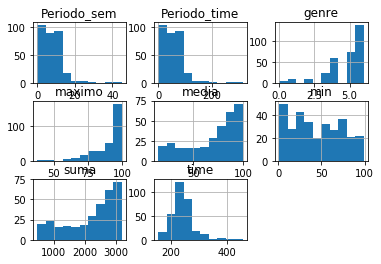

In [297]:
bill_rg.drop(['cate_True'],1).hist()
plt.figure(figsize=(10,10))
plt.show()


In [298]:
bill_rg.describe()

,time,genre,Periodo_time,Periodo_sem,media,min,maximo,suma,cate_True
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,241.375796,4.840764,52.388535,7.484076,69.776373,44.308917,89.710191,2232.843949,0.082803
std,40.291179,1.389185,41.001153,5.857308,24.799372,29.132672,11.980632,793.579917,0.276023
min,156.000000,0.000000,0.000000,0.000000,14.875000,1.000000,38.000000,476.000000,0.000000
25%,218.250000,4.000000,21.000000,3.000000,50.781250,21.000000,85.000000,1625.000000,0.000000
50%,236.000000,5.000000,49.000000,7.000000,78.234375,42.000000,94.000000,2503.500000,0.000000
75%,256.750000,6.000000,70.000000,10.000000,89.835938,70.000000,99.000000,2874.750000,0.000000
max,455.000000,6.000000,315.000000,45.000000,99.750000,99.000000,100.000000,3192.000000,1.000000


In [299]:
bill_rg.corr()

,time,genre,Periodo_time,Periodo_sem,media,min,maximo,suma,cate_True
time,1.000000,0.002271,-0.015218,-0.015218,0.072800,0.018197,0.074461,0.072800,-0.053368
genre,0.002271,1.000000,0.106094,0.106094,-0.217086,-0.145299,-0.226226,-0.217086,0.151144
Periodo_time,-0.015218,0.106094,1.000000,1.000000,-0.615131,-0.581800,-0.340865,-0.615131,0.291307
Periodo_sem,-0.015218,0.106094,1.000000,1.000000,-0.615131,-0.581800,-0.340865,-0.615131,0.291307
media,0.072800,-0.217086,-0.615131,-0.615131,1.000000,0.890610,0.780851,1.000000,-0.531580
min,0.018197,-0.145299,-0.581800,-0.581800,0.890610,1.000000,0.614597,0.890610,-0.441821
maximo,0.074461,-0.226226,-0.340865,-0.340865,0.780851,0.614597,1.000000,0.780851,-0.454524
suma,0.072800,-0.217086,-0.615131,-0.615131,1.000000,0.890610,0.780851,1.000000,-0.531580
cate_True,-0.053368,0.151144,0.291307,0.291307,-0.531580,-0.441821,-0.454524,-0.531580,1.000000


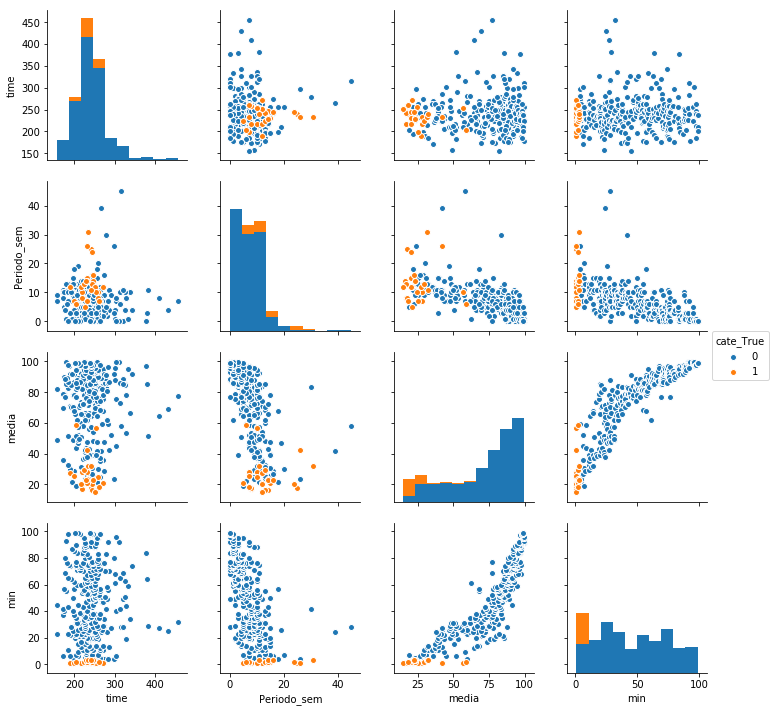

In [300]:
sns.pairplot(bill_rg.dropna(), hue='cate_True',vars=["time","Periodo_sem","media","min"],kind='scatter')

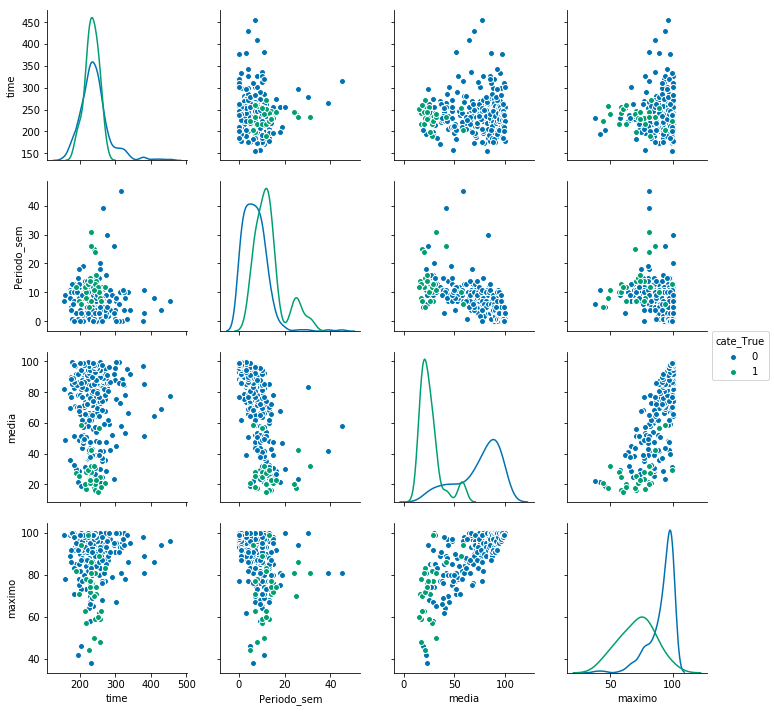

In [301]:
sns.pairplot(bill_rg.dropna(), hue='cate_True', vars=["time","Periodo_sem","media","maximo"],palette="colorblind", diag_kind="kde");

In [302]:
clase_name = bill_rg['cate_True'] # nombre de variable a predecir
columx = bill_rg.columns.values.tolist()


In [303]:
print(columx)

['artista', 'track', 'time', 'genre', 'fechaIngreso', 'fechaPico', 'Periodo_time', 'Periodo_sem', 'media', 'min', 'maximo', 'suma', 'cate_True']


In [304]:
columx=columx[0:12]

In [305]:
print(columx)

['artista', 'track', 'time', 'genre', 'fechaIngreso', 'fechaPico', 'Periodo_time', 'Periodo_sem', 'media', 'min', 'maximo', 'suma']


In [326]:
np.random.seed(123)
m_train    = np.random.rand(len(bill_rg)) < 0.5
data_train = bill_rg.iloc[m_train,]
data_test  = bill_rg.iloc[~m_train,]

In [327]:
#Selecciono las variables numericas
data_train=data_train.iloc[:,[2,3,7,8,9,12]]
#elimino la columna suma y periodo_time(6,11)

In [328]:
data_train.head(10)

,time,genre,Periodo_sem,media,min,cate_True
1,258,6,8.0,17.34375,1.0,1
2,247,6,14.0,16.43750,1.0,1
5,257,6,10.0,24.81250,1.0,1
8,232,6,7.0,28.37500,1.0,1
9,265,5,39.0,41.75000,24.0,0
10,190,6,12.0,27.43750,1.0,1
12,241,6,25.0,17.56250,1.0,1
13,232,6,26.0,42.12500,1.0,1
14,243,6,13.0,16.65625,1.0,1
16,254,6,10.0,56.50000,1.0,1


In [329]:
data_test=data_test.iloc[:,[2,3,7,8,9,12]]

In [330]:
data_test.shape

(158, 6)

In [331]:
data_train.shape

(156, 6)

In [332]:
# MODELO
modelo = LogisticRegression()
modelo.fit(data_train.iloc[:,:4],data_train.cate_True)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [333]:
predicion = modelo.predict(data_test.iloc[:,:4])

In [334]:
print(metrics.classification_report(y_true=data_test.cate_True, y_pred=predicion))
print(pd.crosstab(data_test.cate_True, predicion, rownames=['REAL'], colnames=['PREDICCION']))  

             precision    recall  f1-score   support

          0       0.95      1.00      0.98       144
          1       1.00      0.50      0.67        14

avg / total       0.96      0.96      0.95       158

PREDICCION    0  1
REAL              
0           144  0
1             7  7


<img src="metricas_1.jpg">

In [335]:
#La tasa de correcta clasificacion es muy buena
accuracy_score ( y_true=data_test.cate_True ,  y_pred=predicion )

0.9556962025316456

In [336]:
gnb = GaussianNB()
modelo_gnb= gnb.fit(data_train.iloc[:,:4],data_train.cate_True)
predic_NB = modelo_gnb.predict(data_test.iloc[:,:4])

In [337]:
print(metrics.classification_report(y_true=data_test.cate_True, y_pred=predic_NB))
print(pd.crosstab(data_test.cate_True, predic_NB, rownames=['REAL'], colnames=['PREDICCION']))  

             precision    recall  f1-score   support

          0       0.97      0.90      0.93       144
          1       0.40      0.71      0.51        14

avg / total       0.92      0.88      0.89       158

PREDICCION    0   1
REAL               
0           129  15
1             4  10


In [338]:
model_trees = ExtraTreesClassifier()
predic_trees=model_trees.fit(data_train.iloc[:,:4], data_train.cate_True)

In [339]:
bill_val=bill_rg.iloc[:,[2,3,7,8,9,12]]

In [340]:
colu=bill_val.columns.values.tolist()[0:4]
var_imp = pd.DataFrame({
 'feature':colu, 
 'v_importance':model_trees.feature_importances_.tolist()
 })
print (var_imp.sort_values(by = 'v_importance', ascending=False))

       feature  v_importance
3        media      0.500086
2  Periodo_sem      0.220564
0         time      0.219541
1        genre      0.059809


estamos viendo la importancia de cada variable en el modelo

In [341]:
bill_rg.groupby('genre')[['cate_True']].mean()

,cate_True
genre,
0,0.000000
1,0.222222
2,0.000000
3,0.000000
4,0.017241
5,0.000000
6,0.167883


In [342]:
model = sm.formula.glm("cate_True ~C(time,genre,Periodo_sem,media,min)", family=sm.families.Binomial(), data=data_train).fit()
print(model.summary())

PatsyError: Error evaluating factor: TypeError: C() takes from 1 to 3 positional arguments but 5 were given
    cate_True ~C(time,genre,Periodo_sem,media,min)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [344]:
bin_model=sm.GLM(exog=data_train.iloc[:,:4],endog=data_train.cate_True,family=sm.families.Binomial())
bin_results = bin_model.fit()
print(bin_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              cate_True   No. Observations:                  156
Model:                            GLM   Df Residuals:                      152
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -20.926
Date:                Fri, 04 May 2018   Deviance:                       41.852
Time:                        13:53:18   Pearson chi2:                     60.5
No. Iterations:                     8                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
time           -0.0020      0.010     -0.198      0.843      -0.022       0.018
genre           0.4282      0.354      1.208     

In [ ]:
sklearn.feature_selection.chi2(data_train.iloc[:,:4],data_train.cate_True)

In [ ]:
sklearn.feature_selection.f_classif(data_train.iloc[:,:4],data_train.cate_True)